In [6]:
!pip install numpy
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib
!pip install keras
import matplotlib.pyplot as plt

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [8]:
# Завантаження та попередня обробка даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Створення та навчання згорткової нейромережі
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=1)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test, y_test, verbose=0)

# Створення та навчання багатошарової нейромережі
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(28, 28)))
model_mlp.add(Dense(1024, activation='relu'))
model_mlp.add(Dropout(0.4))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dropout(0.4))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dropout(0.4))
model_mlp.add(Dense(10, activation='softmax'))

model_mlp.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_mlp = model_mlp.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=1)
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(x_test, y_test, verbose=0)

# Вивід точності моделей та побудова графіка
print(f"Test accuracy (Convolutional Neural Network): {test_acc_cnn}")
print(f"Test accuracy (Multilayer Perceptron): {test_acc_mlp}")

Epoch 1/10
469/469 [==============================] - 55s 115ms/step - loss: 0.6457 - accuracy: 0.7668 - val_loss: 0.4138 - val_accuracy: 0.8535
Epoch 2/10
469/469 [==============================] - 45s 97ms/step - loss: 0.4133 - accuracy: 0.8537 - val_loss: 0.3539 - val_accuracy: 0.8694
Epoch 3/10
469/469 [==============================] - 45s 96ms/step - loss: 0.3634 - accuracy: 0.8691 - val_loss: 0.3225 - val_accuracy: 0.8829
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.3308 - accuracy: 0.8795 - val_loss: 0.3064 - val_accuracy: 0.8888
Epoch 5/10
469/469 [==============================] - 45s 96ms/step - loss: 0.3061 - accuracy: 0.8882 - val_loss: 0.2935 - val_accuracy: 0.8944
Epoch 6/10
469/469 [==============================] - 48s 102ms/step - loss: 0.2889 - accuracy: 0.8945 - val_loss: 0.2788 - val_accuracy: 0.8995
Epoch 7/10
469/469 [==============================] - 49s 105ms/step - loss: 0.2702 - accuracy: 0.9028 - val_loss: 0.2777 - val_accura

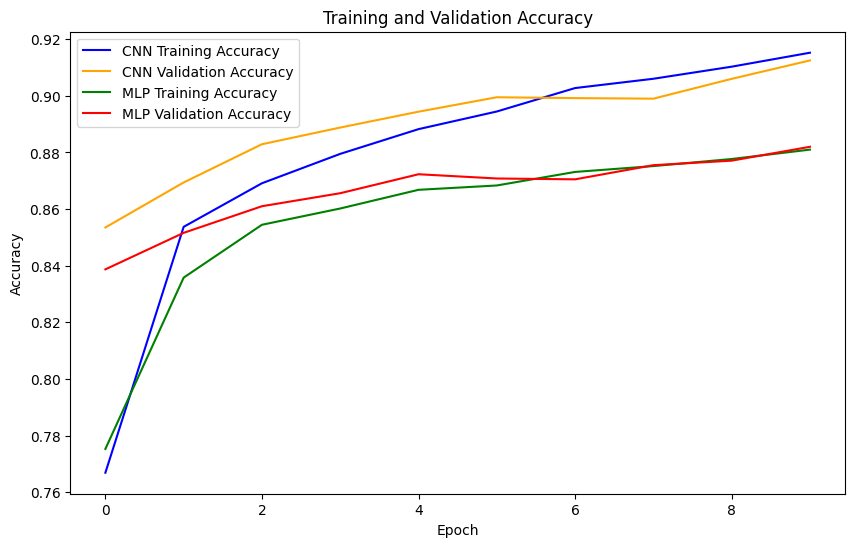

In [9]:
# Графік точності
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy', color='blue')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy', color='orange')
plt.plot(history_mlp.history['accuracy'], label='MLP Training Accuracy', color='green')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Вивід точності моделей та порівняння
print(f"Test accuracy (Convolutional Neural Network): {test_acc_cnn}")
print(f"Test accuracy (Multilayer Perceptron): {test_acc_mlp}")

if test_acc_cnn > test_acc_mlp:
    print("Convolutional Neural Network забезпечує кращу точність.")
elif test_acc_cnn < test_acc_mlp:
    print("Multilayer Perceptron забезпечує кращу точність.")
else:
    print("Точність згорткової та багатошарової нейромереж однакова.")

Test accuracy (Convolutional Neural Network): 0.9125000238418579
Test accuracy (Multilayer Perceptron): 0.8820000290870667
Convolutional Neural Network забезпечує кращу точність.
